
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [13]:
class StandardScalerScratch:
    def fit(self, X):
        self.mean = X.mean(axis=0)
        self.std = X.std(axis=0)
        self.std[self.std == 0] = 1

    def transform(self, X):
        return (X - self.mean) / self.std


In [14]:
class LinearRegressionScratch:
    def __init__(self, lr=0.05, epochs=1500, reg=0.01):
        self.lr = lr
        self.epochs = epochs
        self.reg = reg

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            y_hat = X @ self.w + self.b
            error = y_hat - y

            loss = (error**2).mean() + self.reg * np.sum(self.w**2)
            self.losses.append(loss)

            dw = (2/n) * (X.T @ error) + 2 * self.reg * self.w
            db = (2/n) * error.sum()

            self.w -= self.lr * dw
            self.b -= self.lr * db


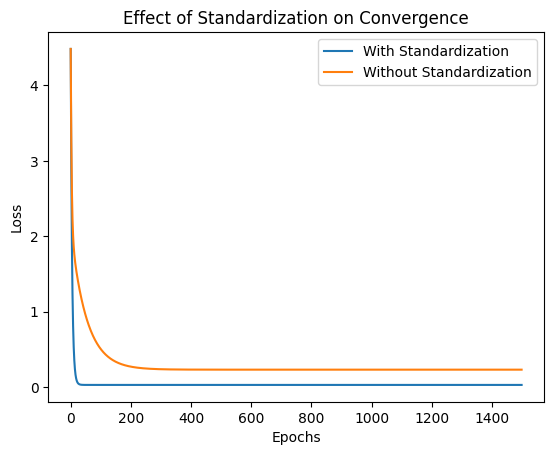

In [15]:
np.random.seed(0)
X = np.random.rand(120, 2)
y = 4*X[:,0] - 3*X[:,1] + 1 + np.random.randn(120)*0.1

scaler = StandardScalerScratch()
scaler.fit(X)
Xs = scaler.transform(X)

# With standardization
model_std = LinearRegressionScratch()
model_std.fit(Xs, y)

# Without standardization
model_raw = LinearRegressionScratch()
model_raw.fit(X, y)

plt.plot(model_std.losses, label="With Standardization")
plt.plot(model_raw.losses, label="Without Standardization")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Effect of Standardization on Convergence")
plt.legend()
plt.show()



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [16]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


In [17]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.1, epochs=1200):
        self.lr = lr
        self.epochs = epochs

    def fit(self, X, y):
        n, d = X.shape
        self.w = np.zeros(d)
        self.b = 0
        self.losses = []

        for _ in range(self.epochs):
            z = X @ self.w + self.b
            p = sigmoid(z)

            loss = -(y*np.log(p + 1e-9) + (1-y)*np.log(1-p + 1e-9)).mean()
            self.losses.append(loss)

            dw = (X.T @ (p - y)) / n
            db = (p - y).mean()

            self.w -= self.lr * dw
            self.b -= self.lr * db


Training Accuracy: 0.99


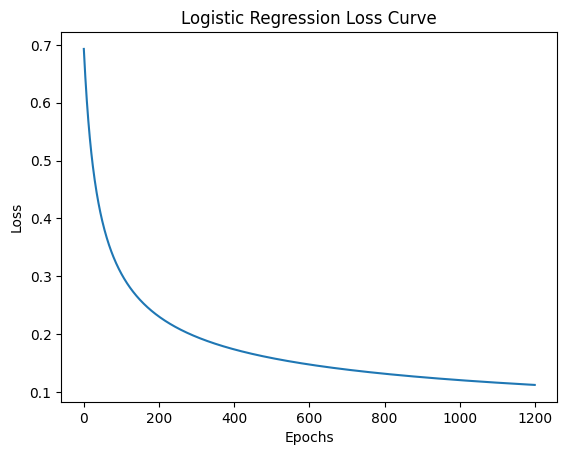

In [18]:
np.random.seed(1)
X = np.random.randn(200, 2)
y = (X[:,0] + X[:,1] > 0).astype(int)

model = LogisticRegressionScratch()
model.fit(X, y)

pred = (sigmoid(X @ model.w + model.b) >= 0.5).astype(int)
accuracy = (pred == y).mean()

print("Training Accuracy:", accuracy)

plt.plot(model.losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Logistic Regression Loss Curve")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [19]:
class KMeansScratch:
    def __init__(self, k=3, iters=100):
        self.k = k
        self.iters = iters

    def fit(self, X):
        n = X.shape[0]
        idx = np.random.choice(n, self.k, replace=False)
        self.centroids = X[idx]

        for _ in range(self.iters):
            labels = self.assign_clusters(X)

            new_centroids = np.array([
                X[labels == i].mean(axis=0) for i in range(self.k)
            ])

            if np.allclose(self.centroids, new_centroids):
                break

            self.centroids = new_centroids

        self.labels = labels

    def assign_clusters(self, X):
        distances = np.linalg.norm(
            X[:, None] - self.centroids, axis=2
        )
        return np.argmin(distances, axis=1)


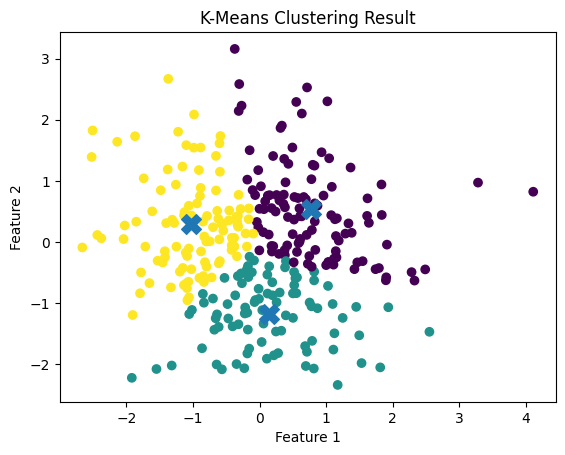

In [20]:
np.random.seed(2)
X = np.random.randn(300, 2)

kmeans = KMeansScratch(k=3)
kmeans.fit(X)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels)
plt.scatter(
    kmeans.centroids[:,0],
    kmeans.centroids[:,1],
    s=200,
    marker='X'
)
plt.title("K-Means Clustering Result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
